In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from myFunctions import *

# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

In [2]:
stockData=pd.read_csv('stockData_2021.csv')
#stockData=stockData.loc[:420000-1]
priceData = pd.read_csv('priceData_2021.csv')
print(priceData.shape)
print(stockData.shape)
print(priceData.index[-1])
print(stockData.index[-1])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,10,12,14,22,23,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(536962, 16)
(536960, 152)
536961
536959


In [3]:
X=pd.read_csv('filteredAnnualStockFeatures_2021.csv', index_col=0)
y=pd.read_csv('filteredAnnualStockPerformance_2021.csv', index_col=0)

In [4]:
X

,P/E,P/S,P/B,RoE,ROCE,grossProfitMargin,fixedAssetTurnover,workingAssetTurnover,workingCapitalRatio,BookEquity/TL,Debt/Equity,cashRatio,debtRatio,EV/EBIT,Op. In./(NWC+FA),Op. In./interestExpense,EBIT/TA,RE/TA,(CA-CL)/TA
0,26.816620,0.880630,0.907877,0.033855,0.018048,0.378024,3.168282,1.834964,3.748255,4.062929,0.246128,0.668021,5.062929,41.026795,0.042557,1000.000000,0.015087,0.554589,0.450862
1,163.704541,0.752115,0.728977,0.004453,0.003087,0.470877,1.281196,5.076150,1.591329,2.555042,0.391383,0.383850,3.555042,191.441996,0.009579,5.365682,0.002371,0.419181,0.137230
2,45.925423,1.154025,1.119339,0.024373,0.020467,0.432701,1.470584,3.380124,1.957267,2.642927,0.378368,0.650748,3.642927,42.261978,0.022187,35.353110,0.016016,0.430594,0.208185
3,7.612752,0.573782,0.586122,0.076992,0.057261,0.445133,1.245789,5.275660,1.506044,2.091147,0.478206,0.399890,3.091147,8.188278,0.094965,11.510475,0.042439,0.508946,0.130987
5,6.783145,1.231717,1.073833,0.158309,0.093938,0.417502,2.495333,1.489680,3.862203,4.225143,0.236678,0.520255,5.225143,9.977479,0.039590,1000.000000,0.078407,0.550837,0.473234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536952,11.469842,1.098071,2.252136,0.196353,0.062050,0.304257,9.480703,21.606389,1.386766,1.018038,0.982281,0.402259,2.018038,25.196483,1.072602,23.414223,0.054368,-0.082118,0.047887
536954,-15.424809,1.585102,3.095580,-0.200688,-0.390276,0.277990,15.737572,-126.437084,0.942130,1.135171,0.880924,0.266877,2.135171,-5.650383,2.303637,0.520893,-0.334895,-0.266438,-0.008212
536956,21.976809,2.207757,4.865642,0.221399,0.082300,0.297539,11.142327,115.864828,1.069851,1.237284,0.808222,0.325098,2.237284,40.988587,1.690586,27.595090,0.069906,-0.172348,0.010519
536957,9.074972,0.706510,1.647403,0.181533,0.019232,0.313446,2.124815,68.313387,1.082841,0.499573,2.001709,0.349857,1.499573,59.506701,0.335762,6.239987,0.016592,-0.049450,0.011371


In [5]:
stockData['date']=pd.to_datetime(stockData['date'])

Text(0.5, 1.0, 'Annual Report Dates Present in Our Data')

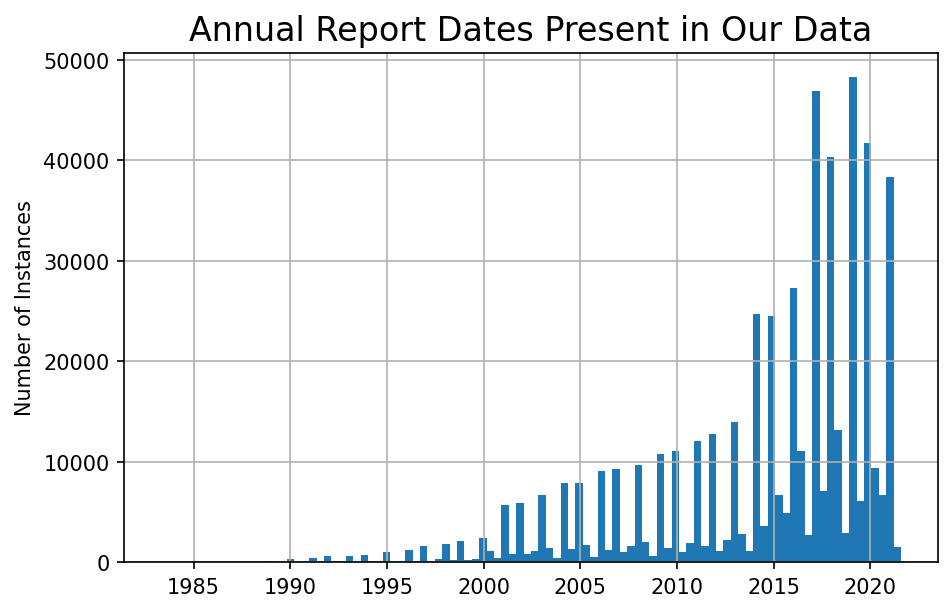

In [6]:
stockData['date'].hist(bins=100)
plt.ylabel('Number of Instances')
plt.title('Annual Report Dates Present in Our Data', fontsize=16)

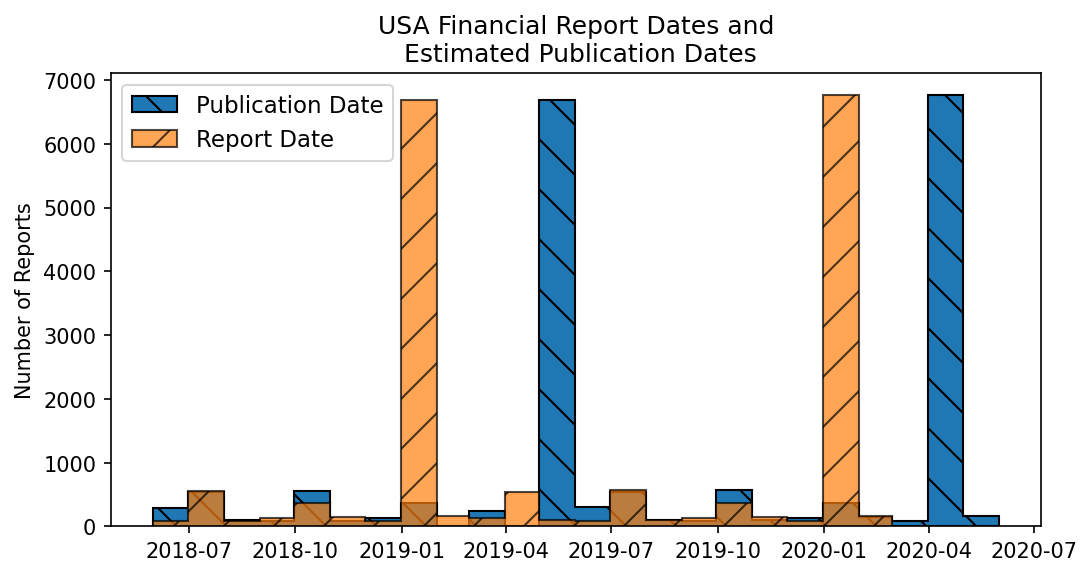

In [7]:
USAStocks = stockData[stockData['CountryName']=='USA'].copy()

# Publication Date when we are sure that the annual report is released
USAStocks['Publication Date'] = \
USAStocks['date'] + pd.Timedelta(days=120) 
plt.figure(figsize=(8,4))

startDate, endDate = '2018-05-01', '2020-06-01'

USAStocks[USAStocks['Publication Date'].between(startDate, endDate)]['Publication Date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='\\', 
      alpha=1, 
      edgecolor='k', 
      histtype='step', 
      fill=True)

USAStocks[USAStocks['Publication Date'].between(startDate, endDate)]['date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='/', 
      alpha=0.7, 
      edgecolor='k', 
      histtype='step', 
      fill=True)

plt.title('USA Financial Report Dates and\n Estimated Publication Dates');
plt.legend(['Publication Date','Report Date'], 
           loc='upper left',
           prop={'size':11})
plt.ylabel('Number of Reports')
plt.grid()

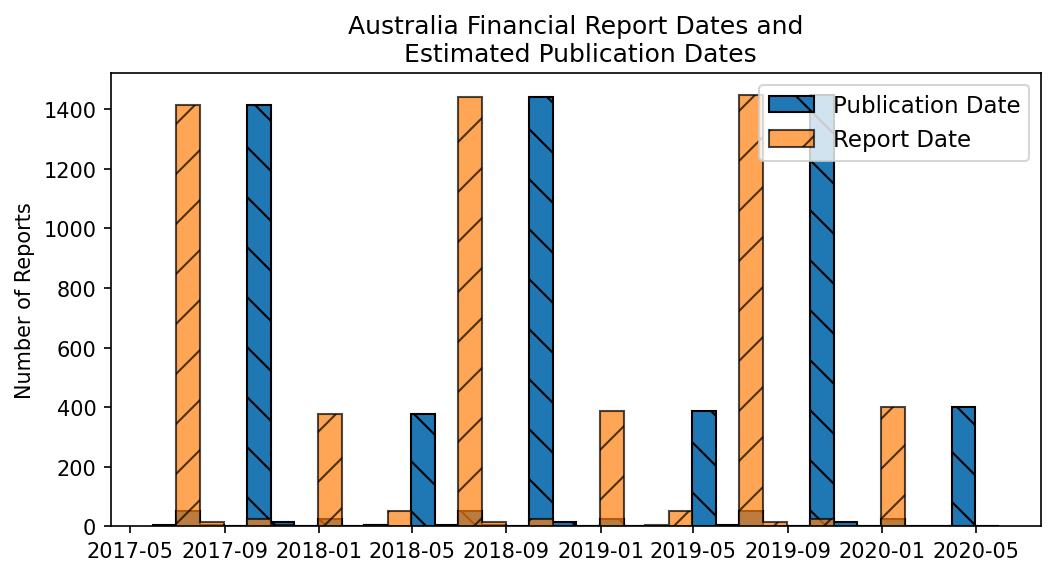

In [8]:
AUSStocks = stockData[stockData['CountryName']=='Australia'].copy()
AUSStocks['Publication Date'] = AUSStocks['date'] + pd.Timedelta(days=120) # When we are sure that the annual report is released
plt.figure(figsize=(8,4))

startDate, endDate = '2017-05-01', '2020-06-01'

AUSStocks[AUSStocks['Publication Date'].between(startDate, endDate)]['Publication Date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='\\', 
      alpha=1, 
      edgecolor='k', 
      histtype='step', 
      fill=True)


AUSStocks[AUSStocks['Publication Date'].between(startDate, endDate)]['date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='/', 
      alpha=0.7, 
      edgecolor='k', 
      histtype='step', 
      fill=True)

plt.title('Australia Financial Report Dates and\n Estimated Publication Dates');
plt.legend(['Publication Date','Report Date'], 
           loc='upper right',
           prop={'size':11})
plt.ylabel('Number of Reports')
plt.grid()

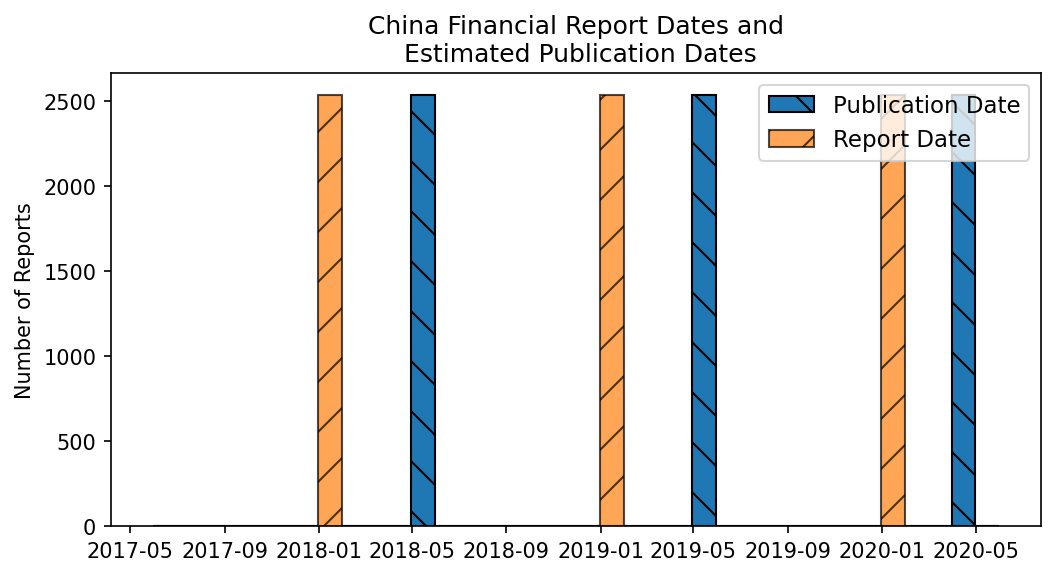

In [10]:
CNStocks = stockData[stockData['CountryName']=='China'].copy()
CNStocks['Publication Date'] = CNStocks['date'] + pd.Timedelta(days=120) # When we are sure that the annual report is released
plt.figure(figsize=(8,4))

startDate, endDate = '2017-05-01', '2020-06-01'

CNStocks[CNStocks['Publication Date'].between(startDate, endDate)]['Publication Date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='\\', 
      alpha=1, 
      edgecolor='k', 
      histtype='step', 
      fill=True)


CNStocks[CNStocks['Publication Date'].between(startDate, endDate)]['date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='/', 
      alpha=0.7, 
      edgecolor='k', 
      histtype='step', 
      fill=True)

plt.title('China Financial Report Dates and\n Estimated Publication Dates');
plt.legend(['Publication Date','Report Date'], 
           loc='upper right',
           prop={'size':11})
plt.ylabel('Number of Reports')
plt.grid()

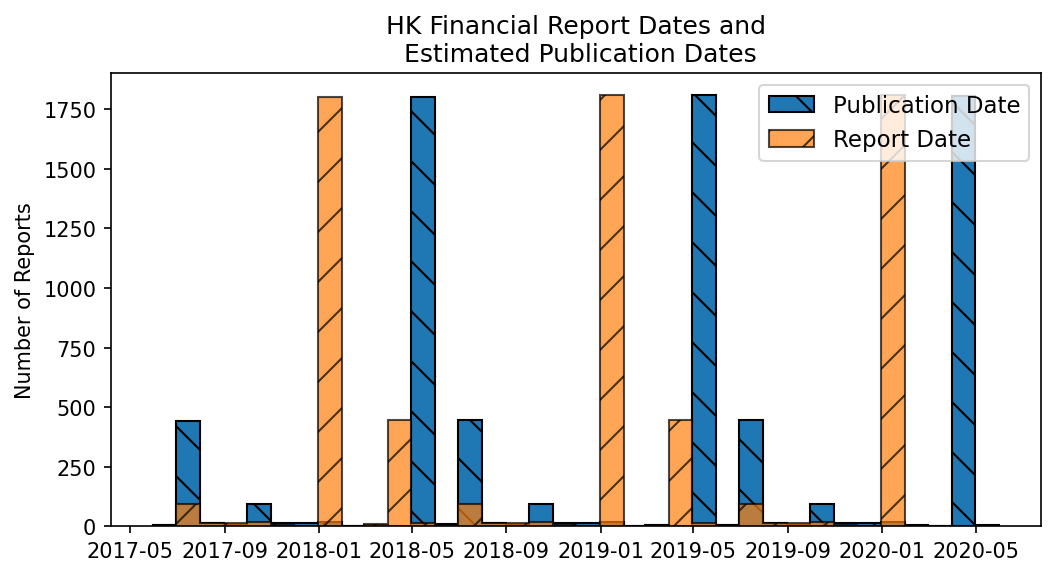

In [11]:
HKStocks = stockData[stockData['CountryName']=='Hong Kong'].copy()
HKStocks['Publication Date'] = HKStocks['date'] + pd.Timedelta(days=120) # When we are sure that the annual report is released
plt.figure(figsize=(8,4))

startDate, endDate = '2017-05-01', '2020-06-01'

HKStocks[HKStocks['Publication Date'].between(startDate, endDate)]['Publication Date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='\\', 
      alpha=1, 
      edgecolor='k', 
      histtype='step', 
      fill=True)


HKStocks[HKStocks['Publication Date'].between(startDate, endDate)]['date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='/', 
      alpha=0.7, 
      edgecolor='k', 
      histtype='step', 
      fill=True)

plt.title('HK Financial Report Dates and\n Estimated Publication Dates');
plt.legend(['Publication Date','Report Date'], 
           loc='upper right',
           prop={'size':11})
plt.ylabel('Number of Reports')
plt.grid()

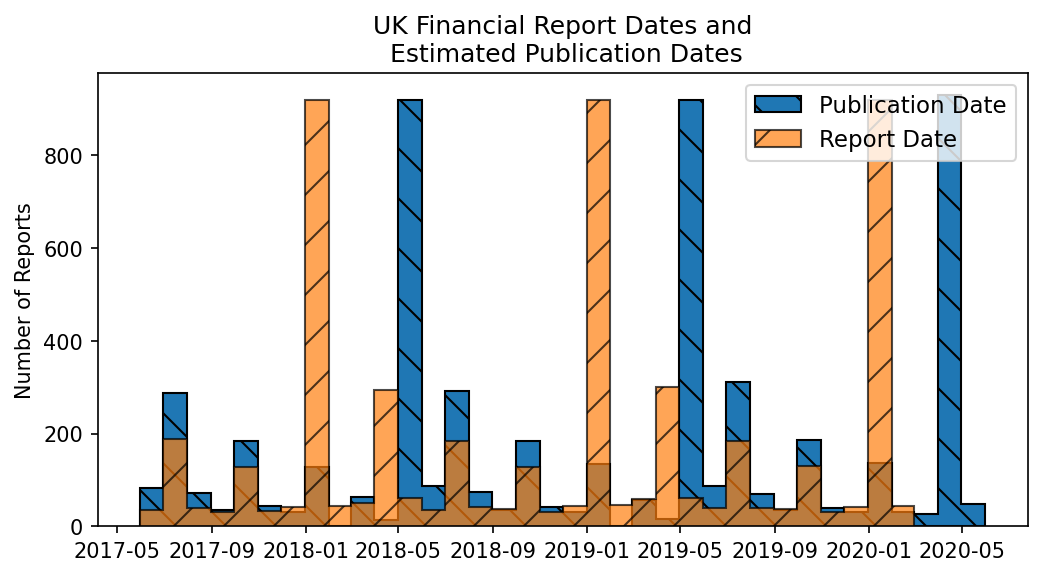

In [12]:
UKStocks = stockData[stockData['CountryName']=='UK'].copy()
UKStocks['Publication Date'] = UKStocks['date'] + pd.Timedelta(days=120) # When we are sure that the annual report is released
plt.figure(figsize=(8,4))

startDate, endDate = '2017-05-01', '2020-06-01'

UKStocks[UKStocks['Publication Date'].between(startDate, endDate)]['Publication Date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='\\', 
      alpha=1, 
      edgecolor='k', 
      histtype='step', 
      fill=True)


UKStocks[UKStocks['Publication Date'].between(startDate, endDate)]['date']\
.hist(bins=pd.date_range(start=startDate, end=endDate, freq='M'),
      hatch='/', 
      alpha=0.7, 
      edgecolor='k', 
      histtype='step', 
      fill=True)

plt.title('UK Financial Report Dates and\n Estimated Publication Dates');
plt.legend(['Publication Date','Report Date'], 
           loc='upper right',
           prop={'size':11})
plt.ylabel('Number of Reports')
plt.grid()

In [13]:
stockData['CountryName'].value_counts()

USA             125293
Germany         115380
Hong Kong        32411
China            31210
India            30885
Canada           25926
Australia        23942
Korea            23143
UK               21150
Taiwan           15399
Thailand          9610
France            9479
Indonesia         8688
Malaysia          7174
Israel            4923
Turkey            4877
Sweden            4851
Singapore         4342
Italy             3840
Mexico            3820
Brazil            3436
Russia            3107
Poland            2419
Norway            2380
South Africa      2307
Finland           2162
Switzerland       1885
Denmark           1884
Spain             1655
Belgium           1548
Philippines       1367
Saudi Arabia      1355
Netherlands       1193
Greece             907
Argentina          600
Chile              556
Portugal           550
Pakistan           527
Austria            415
Ireland            190
Iceland            164
Unknown             10
Name: CountryName, dtype: int64

In [14]:
stockData[stockData['date']<'2011-01-01'][stockData[stockData['date']<'2011-01-01']['CountryName']=='China']

,Code,Type,Name,Exchange,CurrencyCode,CurrencyName,CurrencySymbol,CountryName,CountryISO,ISIN,...,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments,endPeriodCashFlow,freeCashFlow,netDebt,netInvestedCapital,netWorkingCapital,num_shares
53623,200011,Common Stock,Shenzhen Properties & Resources Development (G...,SHE,HKD,Hong Kong Dollar,HK$,China,CN,CNE000000289,...,NaN,NaN,90396000.0,NaN,NaN,NaN,NaN,NaN,NaN,520224250.0
53624,200011,Common Stock,Shenzhen Properties & Resources Development (G...,SHE,HKD,Hong Kong Dollar,HK$,China,CN,CNE000000289,...,NaN,NaN,76427000.0,NaN,NaN,NaN,NaN,NaN,NaN,520224250.0
53626,200011,Common Stock,Shenzhen Properties & Resources Development (G...,SHE,HKD,Hong Kong Dollar,HK$,China,CN,CNE000000289,...,NaN,NaN,69470000.0,NaN,NaN,NaN,NaN,NaN,NaN,520224250.0
53627,200011,Common Stock,Shenzhen Properties & Resources Development (G...,SHE,HKD,Hong Kong Dollar,HK$,China,CN,CNE000000289,...,NaN,NaN,82903000.0,NaN,NaN,NaN,NaN,NaN,NaN,520224250.0
53628,200011,Common Stock,Shenzhen Properties & Resources Development (G...,SHE,HKD,Hong Kong Dollar,HK$,China,CN,CNE000000289,...,NaN,NaN,174999000.0,NaN,NaN,NaN,NaN,NaN,NaN,520224250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140070,900957,Common Stock,"Shanghai Lingyun Industries Development Co., Ltd",SHG,USD,US Dollar,$,China,CN,CNE0000013W9,...,NaN,NaN,8659000.0,NaN,NaN,NaN,NaN,NaN,NaN,349000000.0
140073,900957,Common Stock,"Shanghai Lingyun Industries Development Co., Ltd",SHG,USD,US Dollar,$,China,CN,CNE0000013W9,...,NaN,NaN,23586000.0,NaN,NaN,NaN,NaN,NaN,NaN,349000000.0
140074,900957,Common Stock,"Shanghai Lingyun Industries Development Co., Ltd",SHG,USD,US Dollar,$,China,CN,CNE0000013W9,...,NaN,NaN,14006000.0,NaN,NaN,NaN,NaN,NaN,NaN,349000000.0
140075,900957,Common Stock,"Shanghai Lingyun Industries Development Co., Ltd",SHG,USD,US Dollar,$,China,CN,CNE0000013W9,...,NaN,NaN,23682000.0,NaN,NaN,NaN,NaN,NaN,NaN,349000000.0
